#Data Preprocessing (Data Cleansing) </br>

Hal yang akan kita lakukan adalah: </br>
1. Mencari ID pelanggan (Nomor telephone) yang valid </br>
2. Mengatasi data-data yang masih kosong (Missing Values) </br>
3. Mengatasi Nilai-Nilai Pencilan (Outlier) dari setiap Variable </br>
4. Menstandarisasi Nilai dari Variable


**Library yang digunakan**</br>

1. Pandas (Python for Data Analysis) merupakan library Python yang fokus untuk proses analisis data karena library ini diperuntukkan untuk mengolah data. Disini kita akan menggunakan function yang terdapat dalam library Pandas antara lain:


*   **read_csv** digunakan untuk membaca file yang memiliki ekstensi csv
*   **str.match()** digunakan untuk mencocokkan suatu karakter tertentu
*   **drop()** digunakan untuk menghapus
*   **count()** digunakan untuk menghitung suatu variabel
*   **drop_duplicates()** digunakan untuk menghapus baris-baris yang duplikat
*   **fillna()** digunakan untuk mengisi nilai yang kosong dengan nilai tertentu
*  **quantile()** digunakan untuk melihat ke quantile tertentu
*  **mask()** digunakan untuk mengganti nilai tertentu jika kondisi memenuhi
*  **astype()** digunakan untuk mengubah tipe data 
*  **value_counts()** digunakan untuk menghitung nilai unik pada suatu kolom 
*  **sort_values()** digunakan untuk menyortir suatu nilai dengan menggunakan suatu kolom spesifik
*  **isnull()** untuk mengecek adanya missing values
*  **dropna()** digunakan untuk menghapus missing values
*  **replace()** digunakan untuk mengganti suatu nilai

2. Matplotlib merupakan library python yang digunakan untuk membuat visualisasi data dalam bentuk grafik, plot, histogram, dan sebagainya. 
*  **figure()** untuk membuat figure gambar baru

3. Seaborn menyediakan beberapa plot tambahan untuk mempercantik tampilan.
*  **box_plot()** digunakan untuk membuat box_plot



**Data yang digunakan**

Kolom yang terdapat pada dataset berikut antara lain:
*  **UpdatedAt** Waktu kapan data diambil
*  **customerID** Customer ID
*  **gender** Jenis kelamin customer (Male, Female)
*  **SeniorCitizen** Apakah customer adalah senior cetizen atau bukan (1,0)
*  **Partner** Apakah customer adalah partner ata bukan (Yes, No)
*  **Dependents** Apakah customer memiliki dependents/tanggungan atau tidak (Yes, No)
*  **tenure** Berapa lama(bulan) customer sudah berlanggan dengan company
*  **PhoneService** Apakah customer memiliki phone service atau tidak (Yes, No)
*  **MultipleLines** Apakah customer memiliki multiple lines atau tidak (Yes, No)
*  **InternetService** Internet Service Provider yang digunakan oleh customer (DSL, Fiber Optic, No)
*  **OnlineSecurity** Apakah customer memiliki online security atau tidak (Yes, No, No Internet Service)
*  **OnlineBackUp** Apakah customer memiliki online backup atau tidak (Yes, No, No Internet Service)
* **DeviceProtection** Apakah customer memiliki device protection atau tidak (Yes, No, No Internet Service)
*  **TechSupport** Apakah customer memiliki tech support atau tidak (Yes, No, No Internet Service)
*  **StreamingTV** Apakah customer memiliki streaming TV atau tidak (Yes, No, No Internet Service)
*  **StreamingMovies** Apakah customer memiliki streaming movies atau tidak (Yes, No, No Internet Service)
*  **Contract** Perjanjian kontrak dengan customer (Month-to-month, One Year, Two Year)
*  **PaperlessBilling** Apakah customer memiliki paperless billing atau tidak (Yes, No)
*  **PaymentMethod** Metod pembayaran oleh customer (Electronic check, Mailed check, Bank Transfer(automatic), Credit card(automatic))
*  **MonthlyCharges** Jumlah yang harus dibayarkan oleh customer tiap bulan
*  **TotalCharges** Total jumlah yang harus dibayarkan oleh customer
* **Churn** Apakah customer churned(bergejolak, katakanlah pindah ke provider lain) atau tidak (Yes, No)

In [ ]:
#import library dan dataset

import pandas as pd
#Agar kolom tidak terpotong dan bisa ditampilkan semua
pd.options.display.max_columns = 50

df_churn = pd.read_csv('dqlab_telco.csv')

In [ ]:
#5 data teratas
df_churn.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Jumlah baris dan kolom 
print('Jumlah baris dan kolom adalah: ', df_churn.shape)

#Jumlah ID yang unik
print('Jumlah customerID yang unik adalah: ', df_churn.customerID.nunique())

Jumlah baris dan kolom adalah:  (7113, 22)
Jumlah customerID yang unik adalah:  7017


**Memfilter ID Number Pelanggan Format Tertentu**

Kita akan mencari ID Number (Phone Number) pelanggan **customerID** dengan format:

*  Panjang karakter adalah 11-12
*  Terdiri dari angka saja, tidak diperbolehkan ada karakter lain selain angka
* Diawali dengan angka 45 pada 2 digit pertama


In [ ]:
#Buat kolom valid_id untuk menampung customer ID yang sesuai dengan format

df_churn['valid_id'] = df_churn['customerID'].astype(str).str.match(r'(45\d{9,10})')
# astype() digunakan untuk merubah tipe data yang semula numeric ke string
# str.match() & regex untuk mencocokkan dengan kriteria di atas

df_churn=(df_churn[df_churn['valid_id']==True]).drop('valid_id', axis=1)
#drop kolom valid_id dan pertahankan baris yang memiliki value id yang valid atau true

print('Hasil jumlah ID Customer yang terfilter adalah', df_churn['customerID'].count())
#hitung baris berdasar customerID

Hasil jumlah ID Customer yang terfilter adalah 7006


**Memfilter Duplikasi ID Number Pelanggan**

Biasanya duplikasi ID number tipenya:

*  Duplikasi dikarenakan inserting melebihi satu kali dengan nilai yang sama tiap kolomnya
*  Duplikasi dikarenakan inserting beda periode pengambilan data

In [ ]:
#Drop duplicate rows
df_churn.drop_duplicates()

#Drop duplicate ID dan dataframe diurutkan berdasarkan Periode
df_churn=df_churn.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])

print('Hasil jumlah ID Customer yang sudah dihilangkan suplikasinya adalah', df_churn['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan suplikasinya adalah 6993


**Kesimpulan**

<p style="text-align: justify"> Berdasarkan hasil dari data cleansing jumlah baris pertama di load adalah sebanyak 7113 baris dan 22 kolom dengan 7017 customerID yang unik. Setelah mencek validitas customer ID pelanggan, didapatkan hasil sebanyak 6993 baris. </p>

**Mengatasi Missing Values dengan Menghapus Baris**

<p style="text-align: justify"> Kita akan menghapus baris yang tidak terdeteksi apakah dia churn atau tidak. Disini kita asumsikan data modeller hanya mau menerima data yang benar ada flag churn atau tidak. </p>

In [ ]:
print('Total Missing Value yang terdapat pada kolom Churn adalah: ', df_churn['Churn'].isnull().sum())

#Drop baris yang pada kolom Churnnya terdapat missing value
df_churn.dropna(subset=['Churn'], inplace=True)
print('Total baris dan kolom setelah dihapus missing valuenya adalah: ', df_churn.shape)

Total Missing Value yang terdapat pada kolom Churn adalah:  43
Total baris dan kolom setelah dihapus missing valuenya adalah:  (6950, 22)


**Mengatasi Missing Values dengan pengisian nilai tertentu**

Cara lain dalam mengatasi missing value dapat dengan mengisi bagian yang missing value tersebut dengan nilai tertentu. Dalam kasus ini diasumsukan data modeller meminta pengisian values dengan kriteria berikut:

* **Tenure** pihak data modeller meminta setiap baris yang memiliki missing values untuk lama berlangganan di isi dengan 11
*  Variabel yang bersifat numeric selain **Tenure** di isi dengan median dari masing-masing variabel tersebut


In [ ]:
#Check apakah ada missing values menggunakan values.any()

print('Masih terdapat missing value: ', df_churn.isnull().values.any())

#Mencari missing value pada tiap kolom kemudian di jumlah berapa banyak missing values pada tiap kolom dan diurutkan berdasarkan yang paling banyak missing valuenya
print('Jumlah missing values pada setiap kolom: ')
print(df_churn.isnull().sum().sort_values(ascending=False))

#Handling missing value pada kolom Tenure dengan mengisikan 11
df_churn['tenure'].fillna(11, inplace=True)

#Handling missing values pada kolom numerik selain Tenure
for nama_kolom in list(['MonthlyCharges','TotalCharges']):
  median=df_churn[nama_kolom].median()
  df_churn[nama_kolom].fillna(median, inplace=True)

print('Jumlah Missing Values pada masing-masing kolom setelah di imputer datanya: ')
print(df_churn.isnull().sum().sort_values(ascending=False))


Masih terdapat missing value:  True
Jumlah missing values pada setiap kolom: 
tenure              99
MonthlyCharges      26
TotalCharges        15
Churn                0
InternetService      0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
UpdatedAt            0
dtype: int64
Jumlah Missing Values pada masing-masing kolom setelah di imputer datanya: 
Churn               0
TotalCharges        0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport        

**Kesimpulan**

<p align= "justify"> Terdapat Missing Values di beberapa kolom yaitu kolom Churn, tenure, MonthlyCharges & TotalCharges. Namun hal tersebut dapat ditangani dengan mengisi nilai yang kosong tersebut dengan suatu nilai yang diminta atau dengan menggunakan nilai median pada tiap kolom.</p>

**Mendeteksi adanya Outlier (Boxplot)**

<p align= "justify"> Untuk mendeteksi adanya Pencilan dari suatu nilai atau outlier adalah dengan menggunakan Box Plot. Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data (skewness), ukuran tendensi sentral dan ukuran penyebaran (keragaman) data pengamatan.</p>

In [ ]:
print('Persebaran data sebelum melakukan handling pada Outlier: ', df_churn[['tenure','MonthlyCharges','TotalCharges']].describe())

Persebaran data sebelum melakukan handling pada Outlier:              tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.477266       65.783741   2305.083460
std      25.188910       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


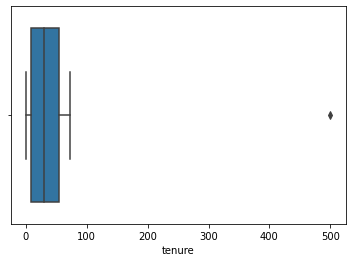

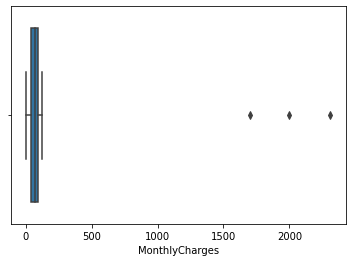

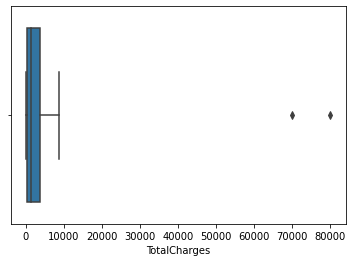

In [ ]:
#import library untuk membuat Box Plot

import matplotlib.pyplot as plt
import seaborn as sns

#Memasukkan variable
#Box Plot untuk kolom tenure
plt.figure() #untuk membuat figure baru
sns.boxplot(x=df_churn['tenure'])
plt.show()

#Box Plot untuk kolom MonthlyCharges
plt.figure()
sns.boxplot(x=df_churn['MonthlyCharges'])
plt.show()

#Box Plot untuk kolom TotalCharges
plt.figure()
sns.boxplot(x=df_churn['TotalCharges'])
plt.show()

**Mengatasi Outlier**

Setelah mengetahui kolom mana saja yang memiliki outlier, selanjutnya outlier tersebut akan diatasi menggunakan interquartile range (IQR). 

In [ ]:
#Handling Outlier menggunakan IQR
#Fungsi quantile untuk melihat nilai quantile tertentu
Q1=(df_churn[['tenure', 'MonthlyCharges', 'TotalCharges']]).quantile(0.25)
Q3=(df_churn[['tenure', 'MonthlyCharges', 'TotalCharges']]).quantile(0.75)

IQR=Q3-Q1
maximum= Q3+(1.5*IQR)
print('Nilai Maximum dari masing-masing Variabel adalah:\n', maximum)
minimum=Q1-(1.5*IQR)
print('Nilai Minimum dari masing-masing Variabel adalah:\n', minimum)

more_than=(df_churn>maximum)
lower_than=(df_churn<minimum)
#Gunakan mask untuk mereplace nilai ketika kondisi nya adalah True
#Jadi ketika ada nilai yang melebihi maximum, nilainya akan direplace oleh nilai maximum yang sudah ditentukan
df_churn=df_churn.mask(more_than, maximum,axis=1)
df_churn=df_churn.mask(lower_than, minimum,axis=1)

print('Persebaran data setelah melakukan handling pada Outlier:', df_churn[['tenure','MonthlyCharges','TotalCharges']].describe())


Nilai Maximum dari masing-masing Variabel adalah:
 tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64
Nilai Minimum dari masing-masing Variabel adalah:
 tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64
Persebaran data setelah melakukan handling pada Outlier:             tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.396691       64.900021   2282.153297
std      24.581515       30.037534   2266.014054
min     -60.000000      -43.618750  -4682.318750
25%       9.000000       36.250000    405.787500
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3793.775000
max      72.000000      118.600000   8670.100000


**Kesimpulan**

<p align= "justify"> Dari ketiga boxplot dengan variabel *tenure*, *MonthlyCharges*, & *TotalCharges*, terlihat bahwa terdpat outlier. Hal ini dapat dilihat dari titik yang terletak cukup jauh dari box plotnya. Kemudian nilai outlier tersebut diatasi dengan mengubah nilainya ke nilai Maximum & Minimum dari interquartile range. Setelah mengatasi outlier, dilihat dari persebaran data bahwa tidak ada lagi nilai yang outlier. </p>

**Mendeteksi Nilai yang tidak Standar**

<p align= "justify"> Disini kita akan melihat nilai yang tidak standar karena kesalahan input. Perbedaan istilah menjadi salah satu faktor yang sering terjadi, untuk itu perlu adanya standar dari data yang telah di input.</p>

In [ ]:
#Loop
for nama_kolom in list(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']):
  print('Jumlah nilai unik \033[31m'+'Sebelum di standarisasi \033[0m dengan Variabel', nama_kolom)
  print(df_churn[nama_kolom].value_counts())

Jumlah nilai unik Sebelum di standarisasi  dengan Variabel gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64
Jumlah nilai unik Sebelum di standarisasi  dengan Variabel SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64
Jumlah nilai unik Sebelum di standarisasi  dengan Variabel Partner
No     3591
Yes    3359
Name: Partner, dtype: int64
Jumlah nilai unik Sebelum di standarisasi  dengan Variabel Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64
Jumlah nilai unik Sebelum di standarisasi  dengan Variabel PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64
Jumlah nilai unik Sebelum di standarisasi  dengan Variabel MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64
Jumlah nilai unik Sebelum di standarisasi  dengan Variabel InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: 

**Menstandarisasi Variable Kategorik**

<p align= "justify"> Setelah kita mengetahui variabel mana saja yang tidak standar, maka akan kita standarkan dengan pola terbanyaknya, dengan syarat tanpa mengubah maknanya. Seperti Iya -> Yes. Kemudian lihat kembali nilai unik di masing-masing variabel yang sudah di ubah. </p>

In [ ]:
df_churn = df_churn.replace(['Wanita', 'Laki-laki', 'Churn', 'Iya'], ['Female', 'Male', 'Yes', 'Yes'])

#Loop
for nama_kolom in list(['gender', 'Dependents', 'Churn']):
  print('Jumlah nilai unik \033[31m'+'Setelah di Standarisasi\033[0m Variabel', nama_kolom)
  print(df_churn[nama_kolom].value_counts())

Jumlah nilai unik Setelah di Standarisasi Variabel gender
Male         3499
Female       3445
Laki-Laki       6
Name: gender, dtype: int64
Jumlah nilai unik Setelah di Standarisasi Variabel Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64
Jumlah nilai unik Setelah di Standarisasi Variabel Churn
No     5114
Yes    1836
Name: Churn, dtype: int64


**Kesimpulan**

Setelah melihat nilai unik dari variabel kategorik, terlihat ada variabel yang tidak standar, antara lain variabel gender, dependents, dan churn.

*  Variabel *gender*: terdapat nilai Female, Male, Wanita, dan Laki-Laki yang nilainya dapat di standarkan menjadi female dan male karena mereka memiliki makna yang sama
* Variabel *dependents*: terdapat nilai Yes, No, dan Iya yang dapat distandarkan nilainya menjadi Yes atau No karena memiliki makna yang sama
* Variabel *Churn*: yang terdapat nilai Yes, No, dan Churn yang bisa di standarisasi nilainya menjadi Yes atau No karena memiliki makna yang sama

#Customer Churn Prediction using Machine Learning

<p align= "justify"> Setelah melakukan data cleansing hal yang dilakukan selanjutnya adalah membuat prediksi menggunakan machine learning. Disini kita akan menggunakan studi kasus Telco yang memiliki banyak cabang. Perusahaan Telco ini sangat memperhatikan customer experiencenya sehingga tidak akan ditinggalkan pelanggan. Namun rupanya pelanggan perusahaan Telco ini mulai ditinggalkan dan beralih langganan ke perusahaan kompetitor. Pihak manajemen ingin mengurangi jumlah pelanggan yang beralih (Churn) dengan menggunakan machine learning. Hal yang akan kita lakukan adalah: </p>
1. Melakukan Exploratory Data Analysis
2. Melakukan Data Pre-Processing
3. Melakukan Pemodelan Machine Learning
4. Menentuka Model Terbaik

**Library yang digunakan**

1. Pandas (Python for Data Analysis) adalah library yang biasa digunakan dalam data science untuk melakukan analisa dan manipulasi data
*  **read_csv()** untuk membaca file dengan ekstensi csv
*  **replace()** untuk mengganti nilai
*  **value_counts()** untuk menghitung nilai unik dari suatu kolom
*  **drop()** untuk menghapus nilai pada suatu kolom atau baris
*  **describe()** untuk melihat deskripsi datanya
2. Matplotlib merupakan library yang digunakan untuk visualisasi data seperti membuat plot grafik
*  **figure()** untuk membuat figure gambar baru
*  **subplots()** untuk membuat gambar dan satu set subplot
*  **title()** untuk memberi judul pada gambar
*  **ylabel()** untuk memberi label pada sumbu Y gambar
*  **xlabel()** untuk memberi label pada sumbu X gambar
*  **pie()** untuk membuat pie chart
3. Seaborn adalah library yang digunakan untuk membangun plot di atas Matplotlib dan memiliki tipe plot tambahan. Library ini dapat membuat visualisasi yang dibuat Matplotlib menjadi lebih cantik
*  **countplot()** untuk membuat plot dengan jumlah pengamatan di setiap bin di kategorik variable
*  **heatmap()** adalah teknik visualisasi data menggunakan gradien warna
4. Scikit-learn merupakan library yang banyak menyediakan algoritma machine learning
*  **LabelEncoder()** untuk merubah nilai pada suatu variabel menjadi 0 atau 1
*  **train_test_split()** untuk membagi data menjadi 2 kelompok (Training & Testing)
*  **LogisticRegression()** untuk memanggil algoritma Logistic Regression
*  **RandomForestClassifier()** untuk memanggil algoritma Random Forest Classifier
*  **confusion_matrix()** untuk membuat confusion matrix
*  **classification_report()** untuk membuat classification report yang berisi akurasi model
5. Xgboost adalah library untuk algoritma extreme gradient boosting (xgboost)
*  **XGBClassifier()** untuk memanggil algoritma XG Boost Classifier
6. Pickle digunakan dalam mengimplementasikan protokol biner untuk serializing dan de-serializing dari struktur objek Python
*  **dump()** untuk menyimpan 

In [ ]:
#import library
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

<p align= "justify"> Disini kita mengansumsikan bahwa untuk mengidentifikasi customer yang beralih ke kompetitor dilihat dari jenis kelamin, senior citizen, partner, berapa lama customer sudah berlangganan, memiliki phone service, memiliki internet service, memiliki streaming tv, memiliki paperless billing, berapa jumlah yang dibebankan kepada customer tiap bulan, dan berapa total yang dibebankan ke customer. </p>

In [ ]:
#Drop kolom yang tidak dibutuhkan 
df_churn = df_churn.drop(['Dependents', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract', 'PaymentMethod'], axis=1)

In [ ]:
#Menampilkan bentuk dataset
print(df_churn.shape)

#Menampilkan jumlah ID yang unik
print(df_churn.customerID.nunique())

(6950, 13)
6950


In [ ]:
df_churn.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,InternetService,StreamingTV,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,1.0,No,DSL,No,Yes,29.85,29.85,No
4727,202006,45315483266,Male,0,Yes,60.0,Yes,No,No internet service,Yes,20.50,1198.80,No
4738,202006,45236961615,Male,0,No,5.0,Yes,Fiber optic,Yes,No,104.10,541.90,Yes
4737,202006,45929827382,Female,0,Yes,72.0,Yes,Fiber optic,Yes,Yes,115.50,8312.75,No
4736,202006,45305082233,Female,0,Yes,56.0,Yes,DSL,Yes,No,81.25,4620.40,No


**Memvisualisasikan Prosentase Churn**

Kita ingin melihat visualisasi data terkai prosentase data churn dari pelanggan

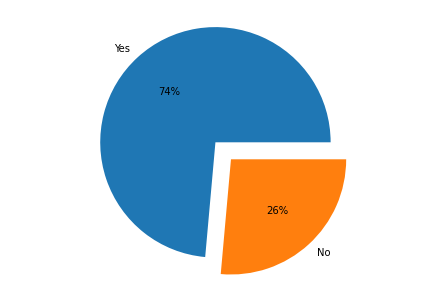

In [ ]:
fig = plt.figure()
#ax = fig.add_axes([x0, y0, width, height])
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes','No']
churn = df_churn.Churn.value_counts()
#Jika ingin angka dibelakang koma sebanyak 1 maka gunakan '%1.1f%%, begitu juga seterusnya
#ada feature explode = 0.1, 0.1 agar tiap bagian terlihat berpisah
ax.pie(churn, labels=labels, explode= (0.1, 0.1), autopct='%.0f%%')
plt.show()

**Exploratory Data Analysis (EDA) Variabel Numerik**

Langkah selanjutnya adalah memilih variabel feature yang bersifat numerik dan membuat plot, kemudian menginterpretasikan.


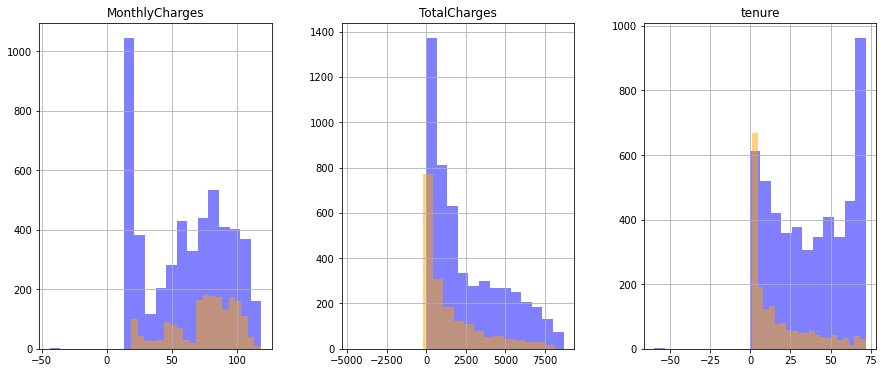

In [ ]:
num_features = ['MonthlyCharges', 'TotalCharges', 'tenure']
fig,ax = plt.subplots(1, 3, figsize=(15,6))

#Buat histogram
df_churn[df_churn.Churn=='No'][num_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_churn[df_churn.Churn=='Yes'][num_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

**Exploratory Data Analysis (EDA) Variabel Kategorik**

Langkah selanjutnya adalah memilih variabel feature yang bersifat kategorik dan membuat plot, kemudian menginterpretasikannya.

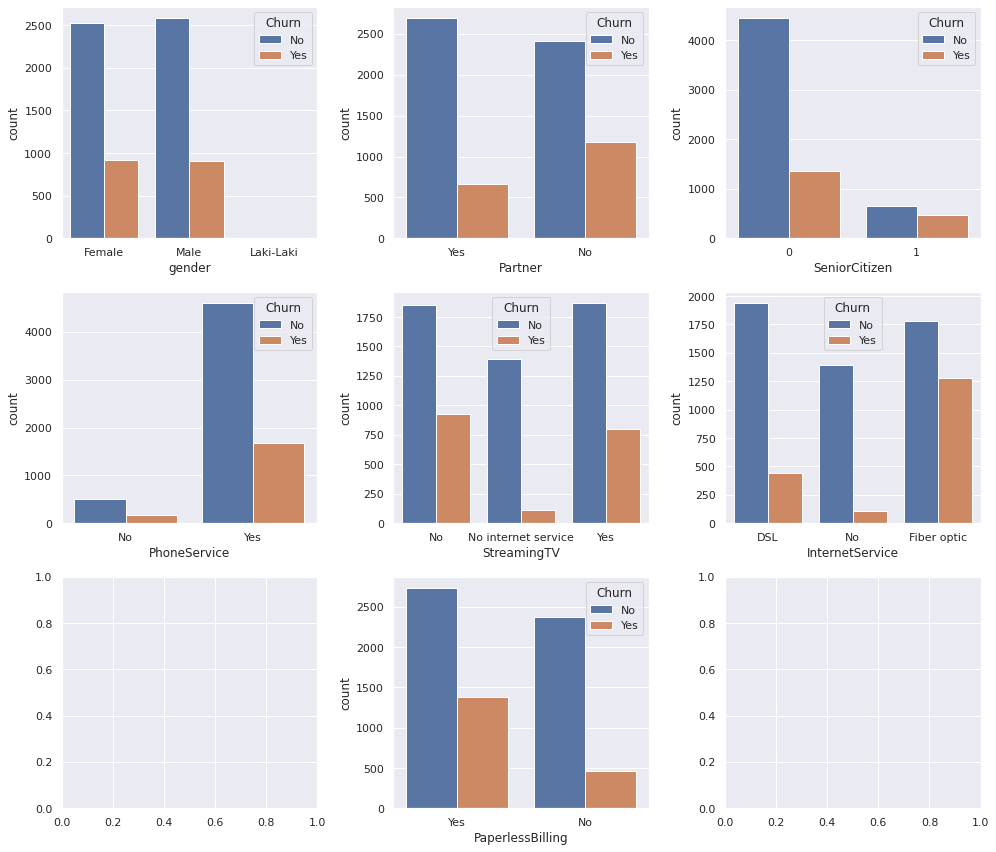

In [ ]:
sns.set(style='darkgrid')

fig,ax = plt.subplots(3, 3, figsize=(14,12))
sns.countplot(data=df_churn, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_churn, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_churn, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_churn, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_churn, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_churn, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_churn, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

**Kesimpulan**

*  Saat mempresentasikan nilai churn, didapatkan bahwa terdapat 26% customer yang beralih ke perusahaan kompetitor (Churn) dan 74% customer tetap bertahan sebagai pelanggan.
*  Pada histogram MonthlyCharges, semakin rendah biaya bulanan yang dikenakan customer, semakin kecil kemungkinan customer akan melakukan churn.
*  Pada histogram tenure, semakin lama seorang customer berlangganan maka semakin kecil kemungkinan customer akan melakukan churn. 
*  Pada histogram TotalCharges, tidak terlihat ada kecenderungan apapun pada churn.
*  Pada variabel gender dan layanan telefonnya (PhoneService), tidak terlihat kecenderungan signifikan bahwa customer melakukan churn atau tidak.
*  Customer yang cenderung melakukan churn adalah customer yang memiliki ciri-ciri orang yang tidak memiliki partner, orang yang merupakan senior citizen, memiliki layanan Streaming TV, memiliki layanan Internet Service, dan menggunakan Paperless Billing. 

**Melakukan Data PreProcessing**

**Menghapus Unnecessary Columns dari data** 

In [ ]:
#Menghapus kolom customerID & UpdatedAt
df_clean = df_churn.drop(['customerID', 'UpdatedAt'], axis=1)
print(df_clean.head())

      gender  SeniorCitizen Partner  tenure PhoneService InternetService  \
0     Female              0     Yes     1.0           No             DSL   
4727    Male              0     Yes    60.0          Yes              No   
4738    Male              0      No     5.0          Yes     Fiber optic   
4737  Female              0     Yes    72.0          Yes     Fiber optic   
4736  Female              0     Yes    56.0          Yes             DSL   

              StreamingTV PaperlessBilling  MonthlyCharges  TotalCharges Churn  
0                      No              Yes           29.85         29.85    No  
4727  No internet service              Yes           20.50       1198.80    No  
4738                  Yes               No          104.10        541.90   Yes  
4737                  Yes              Yes          115.50       8312.75    No  
4736                  Yes               No           81.25       4620.40    No  


**Encoding Data**

<p align= "justify"> Encoding data adalah suatu penyandian. Dalam melakukan pengolahan data menggunakan machine learning, data harus berbentuk dataframe dan numerik. Karena terdapat variabel kategorik, maka variabel kategorik itu harus diubah menjadi numerik. Tapi tidak bisa hanya misal terdapat 2 nilai, female dan male. Katakanlah female bernilai 0 dan male bernilai 1. Hanya karena female 0 dan male 1, bukan berarti kedudukan female itu lebih tinggi dari male atau sebaliknya. Maka dari itu digunakan suatu kode. Misal female memiliki kode 01 dan male 10. </p>

In [ ]:
#Mengubah semua kolom non-numerik ke tipe data numerik

for kolom in df_clean.columns:
  if df_clean[kolom].dtype == np.number: 
    continue
  df_clean[kolom] = LabelEncoder().fit_transform(df_clean[kolom])

print(df_clean.describe())

           gender  SeniorCitizen      Partner       tenure  PhoneService  \
count  6950.00000    6950.000000  6950.000000  6950.000000   6950.000000   
mean      1.00777       0.162302     0.483309    32.396691      0.903741   
std       0.99961       0.368754     0.499757    24.581515      0.294967   
min       0.00000       0.000000     0.000000   -60.000000      0.000000   
25%       0.00000       0.000000     0.000000     9.000000      1.000000   
50%       2.00000       0.000000     0.000000    29.000000      1.000000   
75%       2.00000       0.000000     1.000000    55.000000      1.000000   
max       2.00000       1.000000     1.000000    72.000000      1.000000   

       InternetService  StreamingTV  PaperlessBilling  MonthlyCharges  \
count      6950.000000  6950.000000       6950.000000     6950.000000   
mean          0.872950     0.985180          0.591942       64.900021   
std           0.737618     0.885069          0.491509       30.037534   
min           0.000000 

**Splitting Dataset**

Kita akan membagi dataset menjadi 2 bagian 30% test dan sisanya untuk training. 

In [ ]:
#Feature and target
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']
#Split antara train dan test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Jumlah baris dan kolom dari x_train adalah: ', x_train.shape, '\nJumlah baris dan kolom dari y_train adalah: ', y_train.shape)
print('Prosentase Churn di data Training adalah: \n', y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah: ', x_test.shape, '\nJumlah baris dan kolom dari y_test adalah: ', y_test.shape)
print('Prosentase Churn di data Testing adalah: \n', y_test.value_counts(normalize=True))


Jumlah baris dan kolom dari x_train adalah:  (4865, 10) 
Jumlah baris dan kolom dari y_train adalah:  (4865,)
Prosentase Churn di data Training adalah: 
 0    0.734841
1    0.265159
Name: Churn, dtype: float64
Jumlah baris dan kolom dari x_test adalah:  (2085, 10) 
Jumlah baris dan kolom dari y_test adalah:  (2085,)
Prosentase Churn di data Testing adalah: 
 0    0.738129
1    0.261871
Name: Churn, dtype: float64


**Kesimpulan** 

Dalam melakukan modelling, tidak semua kolom dimasukkan sebagai feature, maka sebaiknya dihilangkan saja, yaitu customerID dan UpdatedAt. Kemudian kita melakukan penyandian terhadap variabel numerik dengan melakukan encoding. Bagian yang terakhir adalah membagi data menjadi 2 bagian, data training dan data test.

**Modelling menggunakan Logistic Regression**

Suatu model yang menggunakan garis regresi untuk menentukan apakah suatu data memiliki nilai yang salah atau benar. 

In [ ]:
#Train model
log_model = LogisticRegression().fit(x_train,y_train)
print('Model Logistic Regression yang terbentuk adalah: \n', log_model)


Model Logistic Regression yang terbentuk adalah: 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Performance Model Training - Menampilkan Metrics**

Setelah membuat model, dilakukan perhitungan untuk memperoleh classification report dan confusion matrix pada data training.


In [ ]:
#Prediksi
y_train_pred = log_model.predict(x_train)
#Print classification report
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      3575
           1       0.63      0.52      0.57      1290

    accuracy                           0.79      4865
   macro avg       0.73      0.71      0.72      4865
weighted avg       0.78      0.79      0.78      4865



**Performance Model Training - Menampilkan Plots**

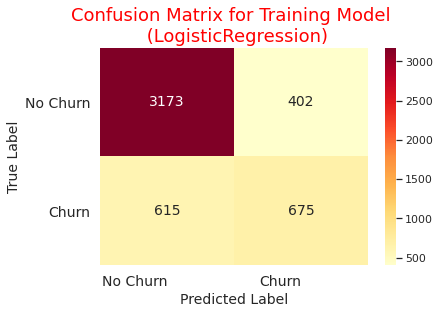

In [ ]:
#Ubah confusion matrix menjadi DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_train_pred)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

#Plot confusion matrix
plt.figure()
#jika annot bernilai true, maka hasil tiap value akan ditampilkan
#format code untuk string, misal untuk berapa angka dibelakang koma
#String formatting code to use when adding annotations
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlOrRd')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model \n (LogisticRegression)', fontsize=18, color='red')
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.show()

**Performance Data Testing - Menampilkan Metrics**


In [ ]:
#Prediksi
y_test_pred = log_model.predict(x_test)
#Print classification report
print('Classification Report Testing model (Logistic Regression): ')
print(classification_report(y_test,y_test_pred))

Classification Report Testing model (Logistic Regression): 
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1539
           1       0.61      0.51      0.56       546

    accuracy                           0.79      2085
   macro avg       0.72      0.70      0.71      2085
weighted avg       0.78      0.79      0.78      2085



**Performance Data Testing - Menampilkan Plots**


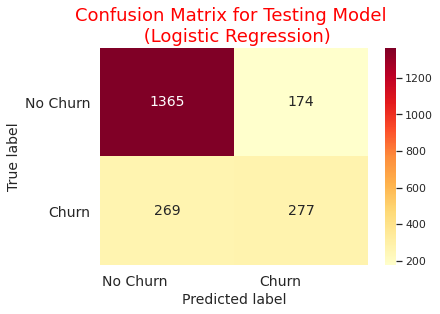

In [ ]:
#Mengubah bentuk confusion matrix menjadi DataFrame

confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_test_pred)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

#Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlOrRd')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model \n (Logistic Regression)', fontsize=18, color='red')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

**Kesimpulan**

*  Pada data Training, model dapat menghasilkan akurasi hingga 79%. Metode pehitungannya adalah data yang sebenarnya adalah no churn dan diprediksi no churn sebanyak 3173 ditambah dengan data yang sebenarnya adalah churn dan diprediksi churn sebanyak 675 dibagi total semua data. Maka, (3173 + 675)/(3173 + 675 + 402 + 615) = 0.79.
*  Pada data Test, model dapat menghasilkan akurasi hingga 79%. Metode pehitungannya adalah data yang sebenarnya adalah no churn dan diprediksi no churn sebanyak 1365 ditambah dengan data yang sebenarnya adalah churn dan diprediksi churn sebanyak 277 dibagi total semua data. Maka, (1365 + 277)/(1365 + 277 + 174 + 269) = 0.79.


**Modelling: Random Forest Classifier**

Random Forest Classifier merupakan salah satu metode dari decision tree yang digunakan untuk mengklasifikasikan data berjumlah besar.

**Pembuatan Model**

In [ ]:
#Train model
rdf_model = RandomForestClassifier().fit(x_train,y_train)
print(rdf_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


**Performance Data Training - Menampilkan Metrics**


In [ ]:
#Prediksi
y_train_pred = rdf_model.predict(x_train)
#Print classification report
print('Classification Report Training Model (Random Forest): ')
print(classification_report(y_train,y_train_pred))

Classification Report Training Model (Random Forest): 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       0.99      0.99      0.99      1290

    accuracy                           1.00      4865
   macro avg       1.00      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865



**Performance Data Training - Menampilkan Plots**

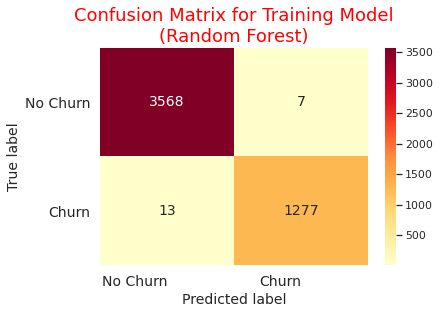

In [ ]:
#Mengubah bentuk confusion matrix menjadi DataFrame

confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_train_pred)),('No Churn', 'Churn'), ('No Churn','Churn'))

#Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlOrRd')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='red')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show() 

**Performance Data Testing - Menampilkan Metrics**



In [ ]:
#Prediksi
y_test_pred = rdf_model.predict(x_test)
#Print classification report
print('Classification Report Testing Model (Random Forest Classifier): ')
print(classification_report(y_test,y_test_pred))

Classification Report Testing Model (Random Forest Classifier): 
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1539
           1       0.59      0.46      0.52       546

    accuracy                           0.78      2085
   macro avg       0.71      0.68      0.69      2085
weighted avg       0.76      0.78      0.77      2085



**Performance Data Testing - Menampilkan Plots**

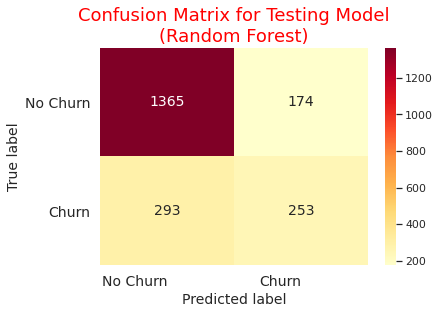

In [ ]:
#Membentuk confusion matrix menjadi DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_test_pred)), ('No Churn','Churn'),('No Churn','Churn'))

#Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlOrRd')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)', fontsize=18, color='red')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

**Kesimpulan**

*  Pada data Training, model dapat menghasilkan akurasi hingga 100%. Metode pehitungannya adalah data yang sebenarnya adalah no churn dan diprediksi no churn sebanyak 3568 ditambah dengan data yang sebenarnya adalah churn dan diprediksi churn sebanyak 1277 dibagi total semua data. Maka, (3568 + 1277)/(3568 + 1277 + 7 + 13) = 0.995.
*  Pada data Test, model dapat menghasilkan akurasi hingga 78%. Metode pehitungannya adalah data yang sebenarnya adalah no churn dan diprediksi no churn sebanyak 1365 ditambah dengan data yang sebenarnya adalah churn dan diprediksi churn sebanyak 253 dibagi total semua data. Maka, (1365 + 253)/(1365 + 253 + 174+ 293) = 0.776.

**Algoritma Gradient Boosting Classifier**

**Pembuatan Model**

In [ ]:
#Train Model

gbt_model = GradientBoostingClassifier().fit(x_train,y_train)
print(gbt_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


**Performance Model Data Training - Menampilkan Metrics**

In [ ]:
#Prediksi
y_train_pred = gbt_model.predict(x_train)
#Print classification report
print('Classification Report Training Model (Gradient Boosting): ')
print(classification_report(y_train,y_train_pred))

Classification Report Training Model (Gradient Boosting): 
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3575
           1       0.70      0.54      0.61      1290

    accuracy                           0.82      4865
   macro avg       0.77      0.73      0.75      4865
weighted avg       0.81      0.82      0.81      4865



**Performance Model Data Training - Menampilkan Plots**


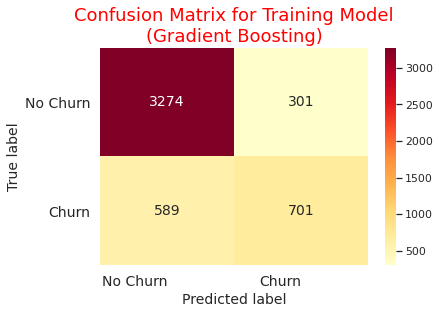

In [ ]:
#Membentuk confusion matrix menjadi DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_train_pred)),('No Churn', 'Churn'),('No Churn', 'Churn'))

#Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlOrRd')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='red')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

**Performance Model Data Testing - Menampilkan Metrics**


In [ ]:
#Prediksi
y_test_pred = gbt_model.predict(x_test)
#Print classification report
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test,y_test_pred))

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.65      0.49      0.56       546

    accuracy                           0.80      2085
   macro avg       0.74      0.70      0.72      2085
weighted avg       0.79      0.80      0.79      2085



**Performansi Model Data Testing - Menampilkan Plots**

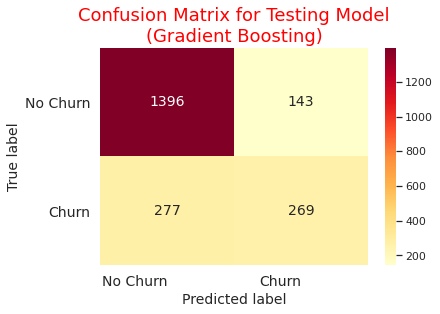

In [ ]:
#Membentuk confusion matrix dari DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_test_pred)), ('No Churn','Churn'), ('No Churn','Churn'))

#Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlOrRd')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='red')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

**Kesimpulan**

*  Pada data Training, model dapat menghasilkan akurasi hingga 82%. Metode pehitungannya adalah data yang sebenarnya adalah no churn dan diprediksi no churn sebanyak 3274 ditambah dengan data yang sebenarnya adalah churn dan diprediksi churn sebanyak 701 dibagi total semua data. Maka, (3274 + 701)/(3274 + 701 + 301 + 589) = 0.817.
*  Pada data Test, model dapat menghasilkan akurasi hingga 79%. Metode pehitungannya adalah data yang sebenarnya adalah no churn dan diprediksi no churn sebanyak 1369 ditambah dengan data yang sebenarnya adalah churn dan diprediksi churn sebanyak 239 dibagi total semua data. Maka, (1369 + 239)/(1369 + 239 + 143 +277) = 0.79.

**Menentukan Algoritma Model Terbaik**

*  Pada algoritma logistic regression, didapatkan akurasi data training sebesar 79% dan akurasi data test sebesar 79%. Ini bisa dinamakan model yang appropriate - fitting.
*  Pada algoritma random forest classifier, didapatkan akurasi data training sebesar 100% namun akurasi data test sebesar 78%. Ini bisa dinamakan model yang overfitting, dimana model sangat baik saat memprediksi data training daripada data testnya.
*  Pada algoritma gradient boosting classifier, didapatkan akurasi data training sebesar 82% dan akurasi data test sebsar 79%.  Ini bisa dinamakan model yang overfitting, dimana model sangat baik saat memprediksi data training daripada data testnya.
*  Dalam kasus ini, algoritma yang baik adalah logistic regression.